# Subjective Verbs

In the previous notebook we looked at large-scale trends in the use of subjects and verbs in the two subcorpora. In this notebook, we turn to understanding possible relationships between the subjects and the verbs that follow them. That is, what kinds of actions are available to the subjects *she* and *he*. How do those actions compare between male speakers and female speakers. Finally, is there a continuity between the actions projected onto a gendered subject and the speaking subject (her or himself) as reflected in the verbs paired with *I*?

<div class="alert alert-block alert-info"> 
    <p>A note about the naming of variables below:</p>
    <ul>
        <li><code>m</code> and <code>w</code> represent the subcorpus, men or women speakers</li>
        <li><code>pp</code> stands for personal pronouns, usually "he," "she," and "I" here.
        <li><code>svo</code> signifies that the complete SVO-triplet is used</li>
        <li><code>sv</code> signifies that just the subject-verb pairs are being used</li>
    </ul>   
</div>

What we want to explore is both the usual ways that speakers (men or women) pair the pronouns *he*, *she*, *i* with verbs and also, perhaps, the significant pairings.

The usual way can be approached via **counts**, which we have visualized in a separate notebook with Sankey plots.

Relative frequencies would let us compare across the two subcorpora ... or would this be approached better by some form of TF-IDF? (And would we need to determine some sort of lower threshold of the number of sentences in which a verb must occur? We're not interested in verb only used in a single sentence but verbs used often in a pairing in one subcorpus and not in the other.)

**TO DO**: Get rid of the square brackets in the object column.

Tried:
```python
w_pp_svo.str.replace('[','').replace(']','')

AttributeError: 'DataFrame' object has no attribute 'str'
```

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATAFRAMES
# the `lem` suffix indicates the verbs have been lemmatized
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

# Save the SVO count for each corpus for calculating relative frequencies
m_svo_count = svos_m.shape[0]
w_svo_count = svos_w.shape[0]

# Output something to check our efforts
print(m_svo_count, w_svo_count)

80460 26610


With the total number of SVOs established, we can use subsets in pandas to isolate the number of unique subject-verb pairs:

In [2]:
m_svpairs = svos_m.value_counts(subset=['subject', 'verb'])
print(m_svpairs.shape)
print(m_svpairs.head(10))

(19993,)
subject  verb
we       have    2259
you      have    1505
i        have    1318
         want    1210
         go      1076
you      see      997
we       do       972
you      get      901
we       go       743
         need     717
dtype: int64


In [3]:
w_svpairs = svos_w.value_counts(subset=['subject', 'verb'])
print(w_svpairs.shape)
print(w_svpairs.head(10))

(8809,)
subject  verb
we       have    674
i        have    586
         want    424
you      have    406
i        go      330
we       need    255
you      see     255
we       do      246
they     have    231
i        do      226
dtype: int64


In [4]:
# Uncomment to save results
# m_svpairs.to_csv("../output/m_svpairs.csv")
# w_svpairs.to_csv("../output/w_svpairs.csv")

<div class="alert alert-block alert-info"> 
    <p>All three parts of the SVO can be subsetted:</p>
    <pre>m_svos = svos_m.value_counts(subset=['subject', 'verb', 'object'])
    
 subject  verb  object
 we       do    [what]    206
                [that]    162
 i        tell  [you]     159
 you      do    [what]    151
          see   [what]    130</pre>
    </div>

## SVOs with 3 Pronouns

In [5]:
# Filter
m_pp_svo = svos_m.loc[(
    svos_m['subject'] == 'he') | (
    svos_m['subject'] == 'she') | (
    svos_m["subject"] == "i")
]
print(m_pp_svo.shape)
print(m_pp_svo.head(10))

(18836, 3)
   subject   verb                                             object
0        i   blow                                       [conference]
1        i   want  [to, thank, all, of, you, for, the, many, nice...
2        i   need                                             [that]
4        i    fly                                              [two]
5        i   have  [to, take, off, my, shoes, or, boots, to, get,...
6        i   tell                                            [story]
7        i  leave                                [the, white, house]
8        i   look                                               [me]
18     she   take                                            [order]
19     she     go                                     [order, voice]


In [6]:
# And now the women subcorpus
w_pp_svo = svos_w.loc[(
    svos_w['subject'] == 'he') | (
    svos_w['subject'] == 'she') | (
    svos_w["subject"] == "i")
]
print(w_pp_svo.shape)
print(w_pp_svo.head(10))

(7585, 3)
   subject     verb                                             object
1      she     turn  [to, be, a, much, bigger, dog, than, i, 'd, an...
5        i  contact                                [parks, department]
6        i  mention                                             [that]
7      she     pull                                               [me]
8      she       be  [dragging, me, ,, and, lo, and, behold, ,, at,...
9        i  mention                                             [that]
10     she     keep  [dragging, me, ,, and, lo, and, behold, ,, at,...
18       i       go  [to, exchange, marriage, vows, with, my, beloved]
20      he       do                                      [which, time]
26       i       do                                            [which]


## SV Pairs with 3 Pronouns

A survey of the SVOs above reveals that there are verbs that frequently appear, those that regularly appear, and those that rarely appear with the three pronouns in which we are interested. We use `value_counts()` combined with `isin()` to get a summary of the three pronouns and verbs.

The results reveal that the 18836 SVOs in the mens subcorpus use only 1723 verbs and the 7585 SVOs in the womens subcorpus use 1069 verbs. Disregarding for the moment how many verbs may only have been used once, it would appear that there is greater variety in women's discourse, but that could also represent the power law dynamic: that as the number of utterances increases, the total vocabulary growth flattens greatly.

In [7]:
# Create a list of the pronouns we want to see
pronouns = ["he", "she", "i"]

# And then count the number of times 
# those pronouns are paired with particular verbs
m_pp_sv = svos_m[svos_m["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()

# Re-label the new column from "0" to something human-readable
m_pp_sv.rename(columns={0:'v_freq'}, inplace=True)

# Add a column with relative frequency
m_pp_sv['v_rfreq'] = m_pp_sv['v_freq'] / m_svo_count

print(m_pp_sv.shape)
print(m_pp_sv.head(10))

(1723, 4)
  subject   verb  v_freq   v_rfreq
0       i   have    1318  0.016381
1       i   want    1210  0.015039
2       i     go    1076  0.013373
3       i     do     650  0.008079
4       i    get     586  0.007283
5       i   like     462  0.005742
6       i  start     377  0.004686
7       i   tell     326  0.004052
8       i  think     316  0.003927
9       i    try     302  0.003753


In [8]:
# Repeat for women's subcorpus
w_pp_sv = svos_w[svos_w["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()

w_pp_sv.rename(columns={0:'v_freq'}, inplace=True)
w_pp_sv['v_rfreq'] = w_pp_sv['v_freq'] / w_svo_count

print(w_pp_sv.shape)
print(w_pp_sv.head(10))

(1069, 4)
  subject   verb  v_freq   v_rfreq
0       i   have     586  0.022022
1       i   want     424  0.015934
2       i     go     330  0.012401
3       i     do     226  0.008493
4       i    get     203  0.007629
5       i   tell     169  0.006351
6       i   like     160  0.006013
7       i   know     154  0.005787
8       i  start     145  0.005449
9       i   love     137  0.005148


In [9]:
# m_pp_sv.to_csv("../output/m_pp_sv.csv")
# w_pp_sv.to_csv("../output/w_pp_sv.csv")

## Subjects as Verb Features

In the cells below, we create 6 distinct dataframes, each containing one of the gendered pronouns, *he* or *she*, or the first person (indexical-referential) pronoun *I*. 

We then have a function that transposes each "subjective" dataframe into a single row with the verbs associated with as columns and their relative frequencies as values.

We then stack those rows using pandas concatenate to get a dataframe with all 6 subject positions and 1381 verbs associated with them.

<div class="alert alert-block alert-info"> 
    <p>There is a lot of repetition here. No doubt there are not only better ways to do this in terms of individual lines of code but also without as many lines of repetitious code as there are here.</p>
    </div>
    
**NOTE**: Possible threshold 0.002 (0.2%) frequency represents at least 38 occurrences in the men's subcorpus and 15 in the women's.

In [10]:
# Get the number of times pronoun appears in SVO:

# Filter for pronoun and drop the un-needed columns
m_he = m_pp_sv.loc[(m_pp_sv['subject'] == 'he')].drop(columns=["subject"])
w_he = w_pp_sv.loc[(w_pp_sv['subject'] == 'he')].drop(columns=["subject"])

# Repeat for "she"
m_she = m_pp_sv.loc[(m_pp_sv['subject'] == 'she')].drop(columns=["subject"])
w_she = w_pp_sv.loc[(w_pp_sv['subject'] == 'she')].drop(columns=["subject"])

# Repeat for "i"
m_i = m_pp_sv.loc[(m_pp_sv['subject'] == 'i')].drop(columns=["subject"])
w_i = w_pp_sv.loc[(w_pp_sv['subject'] == 'i')].drop(columns=["subject"])

print("\n w_i looks like:")
print(w_i.head(10))


 w_i looks like:
    verb  v_freq   v_rfreq
0   have     586  0.022022
1   want     424  0.015934
2     go     330  0.012401
3     do     226  0.008493
4    get     203  0.007629
5   tell     169  0.006351
6   like     160  0.006013
7   know     154  0.005787
8  start     145  0.005449
9   love     137  0.005148


In [11]:
# Print results
# This is the number of svos per `speaker_pronoun`
print(f"m_he:  {sum(m_he['v_freq'])}, w_he:  {sum(w_he['v_freq'])}")
print(f"m_she: {sum(m_she['v_freq'])}, w_she: {sum(w_she['v_freq'])}")
print(f"m_i:   {sum(m_i['v_freq'])}, w_i:   {sum(w_i['v_freq'])}")


m_he:  2548, w_he:  757
m_she: 848, w_she: 643
m_i:   15440, w_i:   6185


In [12]:
# Print results
# This is the proportion of svos per `speaker_pronoun`
print(f"m_he:  {sum(m_he['v_freq'])/m_svo_count}, w_he:  {sum(w_he['v_freq'])/w_svo_count}")
print(f"m_she: {sum(m_she['v_freq'])/m_svo_count}, w_she: {sum(w_she['v_freq'])/w_svo_count}")
print(f"m_i:   {sum(m_i['v_freq'])/m_svo_count}, w_i:   {sum(w_i['v_freq'])/w_svo_count}")


m_he:  0.03166790952025851, w_he:  0.028447951897782788
m_she: 0.010539398458861546, w_she: 0.024163848177376927
m_i:   0.19189659458115835, w_i:   0.23243141676061632


In [13]:
# Filter for pronoun and drop the un-needed columns
m_he = m_pp_sv.loc[(m_pp_sv['subject'] == 'he')].drop(columns=["subject","v_freq"])
w_he = w_pp_sv.loc[(w_pp_sv['subject'] == 'he')].drop(columns=["subject","v_freq"])

# Repeat for "she"
m_she = m_pp_sv.loc[(m_pp_sv['subject'] == 'she')].drop(columns=["subject","v_freq"])
w_she = w_pp_sv.loc[(w_pp_sv['subject'] == 'she')].drop(columns=["subject","v_freq"])

# Repeat for "i"
m_i = m_pp_sv.loc[(m_pp_sv['subject'] == 'i')].drop(columns=["subject","v_freq"])
w_i = w_pp_sv.loc[(w_pp_sv['subject'] == 'i')].drop(columns=["subject","v_freq"])

# Print results
# This is the number of unique verbs per `speaker_pronoun`
print(f"m_he:  {m_he.shape[0]}, w_he:  {w_he.shape[0]}")
print(f"m_she: {m_she.shape[0]}, w_she: {w_she.shape[0]}")
print(f"m_i:   {m_i.shape[0]}, w_i:   {w_i.shape[0]}")
print("\n w_i looks like:")
print(w_i.head(10))

m_he:  514, w_he:  246
m_she: 245, w_she: 221
m_i:   964, w_i:   602

 w_i looks like:
    verb   v_rfreq
0   have  0.022022
1   want  0.015934
2     go  0.012401
3     do  0.008493
4    get  0.007629
5   tell  0.006351
6   like  0.006013
7   know  0.005787
8  start  0.005449
9   love  0.005148


In [14]:
# Print results

# Ignore this, this doesn't make sense because it is unique verbs divided by total number of SVOs
print(f"m_he:  {m_he.shape[0]/m_svo_count}, w_he:  {w_he.shape[0]/w_svo_count}")
print(f"m_she: {m_she.shape[0]/m_svo_count}, w_she: {w_she.shape[0]/w_svo_count}")
print(f"m_i:   {m_i.shape[0]/m_svo_count}, w_i:   {w_i.shape[0]/w_svo_count}")

m_he:  0.006388267462092966, w_he:  0.009244644870349492
m_she: 0.003044991300024857, w_she: 0.008305148440435926
m_i:   0.011981108625403927, w_i:   0.022623074032318675


In [15]:
w_i_set = set(w_i["verb"])
w_he_set = set(w_he["verb"])
w_she_set = set(w_she["verb"])

In [16]:
m_i_set = set(m_i["verb"])
m_he_set = set(m_he["verb"])
m_she_set = set(m_she["verb"])


In [17]:
def set_comps(a,b):
    # Comparison is the number of unique verbs in both sets divided by the number of unique verbs in either set
    return len(a & b)/len(a | b)

In [18]:
print("Comparing w_i and m_i", set_comps(w_i_set, m_i_set))
print("Comparing w_i and w_she", set_comps(w_i_set, w_she_set))
print("Comparing w_i and w_he", set_comps(w_i_set, w_he_set))

print("\n")

print("Comparing m_i and w_i", set_comps(m_i_set, w_i_set))
print("Comparing m_i and m_she", set_comps(w_i_set, m_she_set))
print("Comparing m_i and m_he", set_comps(w_i_set, m_he_set))

print("\n")

print("Comparing w_he and m_he", set_comps(w_he_set, m_he_set))
print("Comparing w_she and m_she", set_comps(w_she_set, m_she_set))

print("\n")

print("Comparing w_she and m_he", set_comps(w_she_set, m_he_set))
print("Comparing w_he and m_she", set_comps(w_he_set, m_she_set))


Comparing w_i and m_i 0.3712784588441331
Comparing w_i and w_she 0.26226993865030673
Comparing w_i and w_he 0.2637853949329359


Comparing m_i and w_i 0.3712784588441331
Comparing m_i and m_she 0.24011713030746706
Comparing m_i and m_he 0.36097560975609755


Comparing w_he and m_he 0.26455906821963393
Comparing w_she and m_she 0.26975476839237056


Comparing w_she and m_he 0.2436548223350254
Comparing w_he and m_she 0.28534031413612565


In [19]:
len(w_he_set & m_he_set)

159

In [20]:
# total verbs

# Number of man verbs

men_verbs = ((m_he_set | m_she_set) | m_i_set)
print(len(men_verbs))

# Number of woman verbs

women_verbs = ((w_he_set | w_she_set) | w_i_set)
print(len(women_verbs))

## Total verbs

len(women_verbs | men_verbs)

1185
716


1381

In [21]:
# Filter for pronoun and drop the un-needed columns
m_he = m_pp_sv.loc[(m_pp_sv['subject'] == 'he')].drop(columns=["subject","v_rfreq"])
w_he = w_pp_sv.loc[(w_pp_sv['subject'] == 'he')].drop(columns=["subject","v_rfreq"])

# Repeat for "she"
m_she = m_pp_sv.loc[(m_pp_sv['subject'] == 'she')].drop(columns=["subject","v_rfreq"])
w_she = w_pp_sv.loc[(w_pp_sv['subject'] == 'she')].drop(columns=["subject","v_rfreq"])

# Repeat for "i"
m_i = m_pp_sv.loc[(m_pp_sv['subject'] == 'i')].drop(columns=["subject","v_rfreq"])
w_i = w_pp_sv.loc[(w_pp_sv['subject'] == 'i')].drop(columns=["subject","v_rfreq"])

# Print results
# This is the number of unique verbs per `speaker_pronoun`
print(f"m_he:  {m_he.shape[0]}, w_he:  {w_he.shape[0]}")
print(f"m_she: {m_she.shape[0]}, w_she: {w_she.shape[0]}")
print(f"m_i:   {m_i.shape[0]}, w_i:   {w_i.shape[0]}")
print("\n w_i looks like:")
print(w_i.head(10))

m_he:  514, w_he:  246
m_she: 245, w_she: 221
m_i:   964, w_i:   602

 w_i looks like:
    verb  v_freq
0   have     586
1   want     424
2     go     330
3     do     226
4    get     203
5   tell     169
6   like     160
7   know     154
8  start     145
9   love     137


Given that there are two tranposes in the next series of cells, if this first one doesn't happen then the second one doesn't need to happen.

In [22]:
def makestackable (df, indexname):
    df_T = df.transpose()
    df_T.columns = df_T.iloc[0]
    df_T.drop(index=df_T.index[0], axis=0, inplace=True)
    df_T.index = [indexname]
    return df_T

In [23]:
m_it = makestackable(m_i, "m_i")
w_it = makestackable(w_i, "w_i")
m_het = makestackable(m_he, "m_he")
w_het = makestackable(w_he, "w_he")
m_shet = makestackable(m_she, "m_she")
w_shet = makestackable(w_she, "w_she")

In [24]:
w_it

verb,have,want,go,do,get,tell,like,know,start,love,...,embarrass,embed,embody,embrace,emphasize,engineer,entrance,envision,escape,investigate
w_i,586,424,330,226,203,169,160,154,145,137,...,1,1,1,1,1,1,1,1,1,1


In [25]:
w_it.shape[1]+ m_it.shape[1] + m_het.shape[1] +  w_het.shape[1] +  m_shet.shape[1] +  w_shet.shape[1]

2792

In [26]:
w_it.shape[1]+ w_het.shape[1] +  w_shet.shape[1]

1069

In [27]:
m_it.shape[1]+ m_het.shape[1] +  m_shet.shape[1]

1723

It's not clear what's getting dropped in this concatenation, but we go from 1723 verbs for men and 1069 verbs for women paired with the three pronouns to 1381. 

In [28]:
concatenated = pd.concat([w_it, m_it, w_het, m_het, w_shet, m_shet])
concatenated.fillna(0, inplace=True)
concatenated.head(6)

verb,have,want,go,do,get,tell,like,know,start,love,...,disturb,dry,emanate,enlighten,capitulate,acquire,admonish,age,aspire,bed
w_i,586,424,330,226,203,169,160,154,145,137,...,0,0,0,0,0,0,0,0,0,0
m_i,1318,1210,1076,650,586,326,462,274,377,271,...,0,0,0,0,0,0,0,0,0,0
w_he,80,20,32,29,19,16,7,4,12,4,...,0,0,0,0,0,0,0,0,0,0
m_he,232,71,78,111,90,58,14,27,42,5,...,0,0,0,0,0,0,0,0,0,0
w_she,63,11,22,33,20,18,6,6,9,10,...,0,0,0,0,0,0,0,0,0,0
m_she,94,32,34,41,24,20,5,10,17,4,...,1,1,1,1,1,1,1,1,1,1


In [29]:
verbs = concatenated.transpose()
print(verbs.shape)
verbs.head()

(1381, 6)


,w_i,m_i,w_he,m_he,w_she,m_she
verb,,,,,,
have,586,1318,80,232,63,94
want,424,1210,20,71,11,32
go,330,1076,32,78,22,34
do,226,650,29,111,33,41
get,203,586,19,90,20,24


In [30]:
verbs["total"] = verbs.sum(axis = 1)

In [31]:
verbs

,w_i,m_i,w_he,m_he,w_she,m_she,total
verb,,,,,,,
have,586,1318,80,232,63,94,2373
want,424,1210,20,71,11,32,1768
go,330,1076,32,78,22,34,1572
do,226,650,29,111,33,41,1090
get,203,586,19,90,20,24,942
...,...,...,...,...,...,...,...
acquire,0,0,0,0,0,1,1
admonish,0,0,0,0,0,1,1
age,0,0,0,0,0,1,1


In [32]:
total = verbs.sum(axis = 0)

In [52]:
total

w_i       6185
m_i      15440
w_he       757
m_he      2548
w_she      643
m_she      848
total    26421
dtype: int64

In [34]:
new_verbs = verbs.copy()

In [35]:
new_verbs

,w_i,m_i,w_he,m_he,w_she,m_she,total
verb,,,,,,,
have,586,1318,80,232,63,94,2373
want,424,1210,20,71,11,32,1768
go,330,1076,32,78,22,34,1572
do,226,650,29,111,33,41,1090
get,203,586,19,90,20,24,942
...,...,...,...,...,...,...,...
acquire,0,0,0,0,0,1,1
admonish,0,0,0,0,0,1,1
age,0,0,0,0,0,1,1


In [36]:
verbs = verbs/total

In [37]:
verbs["total"] = new_verbs["total"]

In [38]:
verbs

,w_i,m_i,w_he,m_he,w_she,m_she,total
verb,,,,,,,
have,0.094745,0.085363,0.105680,0.091052,0.097978,0.110849,2373
want,0.068553,0.078368,0.026420,0.027865,0.017107,0.037736,1768
go,0.053355,0.069689,0.042272,0.030612,0.034215,0.040094,1572
do,0.036540,0.042098,0.038309,0.043564,0.051322,0.048349,1090
get,0.032821,0.037953,0.025099,0.035322,0.031104,0.028302,942
...,...,...,...,...,...,...,...
acquire,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179,1
admonish,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179,1
age,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179,1


In [39]:
total


w_i       6185
m_i      15440
w_he       757
m_he      2548
w_she      643
m_she      848
total    26421
dtype: int64

In [40]:
80/757

0.10568031704095113

In [41]:
verbs_normed = verbs.copy()

In [42]:
cols = verbs.columns
cols = list(cols)[:-1]

In [43]:
## Trying to think of this as TF-IDF --> 

for col in cols:
    verbs[col] = (1/verbs["total"])*verbs[col]

In [44]:
verbs

## Is this TF=IDF-y? Sort of? I think? 

,w_i,m_i,w_he,m_he,w_she,m_she,total
verb,,,,,,,
have,0.000040,0.000036,0.000045,0.000038,0.000041,0.000047,2373
want,0.000039,0.000044,0.000015,0.000016,0.000010,0.000021,1768
go,0.000034,0.000044,0.000027,0.000019,0.000022,0.000026,1572
do,0.000034,0.000039,0.000035,0.000040,0.000047,0.000044,1090
get,0.000035,0.000040,0.000027,0.000037,0.000033,0.000030,942
...,...,...,...,...,...,...,...
acquire,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179,1
admonish,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179,1
age,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179,1


In [45]:
tfidfy = verbs.copy()

In [46]:
tfidfy = tfidfy.drop(columns=["total"])

In [47]:
tfidfy

,w_i,m_i,w_he,m_he,w_she,m_she
verb,,,,,,
have,0.000040,0.000036,0.000045,0.000038,0.000041,0.000047
want,0.000039,0.000044,0.000015,0.000016,0.000010,0.000021
go,0.000034,0.000044,0.000027,0.000019,0.000022,0.000026
do,0.000034,0.000039,0.000035,0.000040,0.000047,0.000044
get,0.000035,0.000040,0.000027,0.000037,0.000033,0.000030
...,...,...,...,...,...,...
acquire,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179
admonish,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179
age,0.000000,0.000000,0.000000,0.000000,0.000000,0.001179


In [48]:
verbs["he_wm"] = verbs["w_he"] - verbs["m_he"]
verbs.head()

,w_i,m_i,w_he,m_he,w_she,m_she,total,he_wm
verb,,,,,,,,
have,0.000040,0.000036,0.000045,0.000038,0.000041,0.000047,2373,6.164565e-06
want,0.000039,0.000044,0.000015,0.000016,0.000010,0.000021,1768,-8.172584e-07
go,0.000034,0.000044,0.000027,0.000019,0.000022,0.000026,1572,7.417228e-06
do,0.000034,0.000039,0.000035,0.000040,0.000047,0.000044,1090,-4.820609e-06
get,0.000035,0.000040,0.000027,0.000037,0.000033,0.000030,942,-1.085217e-05


In [49]:
verbs["she_wm"] = verbs["w_she"] - verbs["m_she"]
verbs.head()

,w_i,m_i,w_he,m_he,w_she,m_she,total,he_wm,she_wm
verb,,,,,,,,,
have,0.000040,0.000036,0.000045,0.000038,0.000041,0.000047,2373,6.164565e-06,-0.000005
want,0.000039,0.000044,0.000015,0.000016,0.000010,0.000021,1768,-8.172584e-07,-0.000012
go,0.000034,0.000044,0.000027,0.000019,0.000022,0.000026,1572,7.417228e-06,-0.000004
do,0.000034,0.000039,0.000035,0.000040,0.000047,0.000044,1090,-4.820609e-06,0.000003
get,0.000035,0.000040,0.000027,0.000037,0.000033,0.000030,942,-1.085217e-05,0.000003


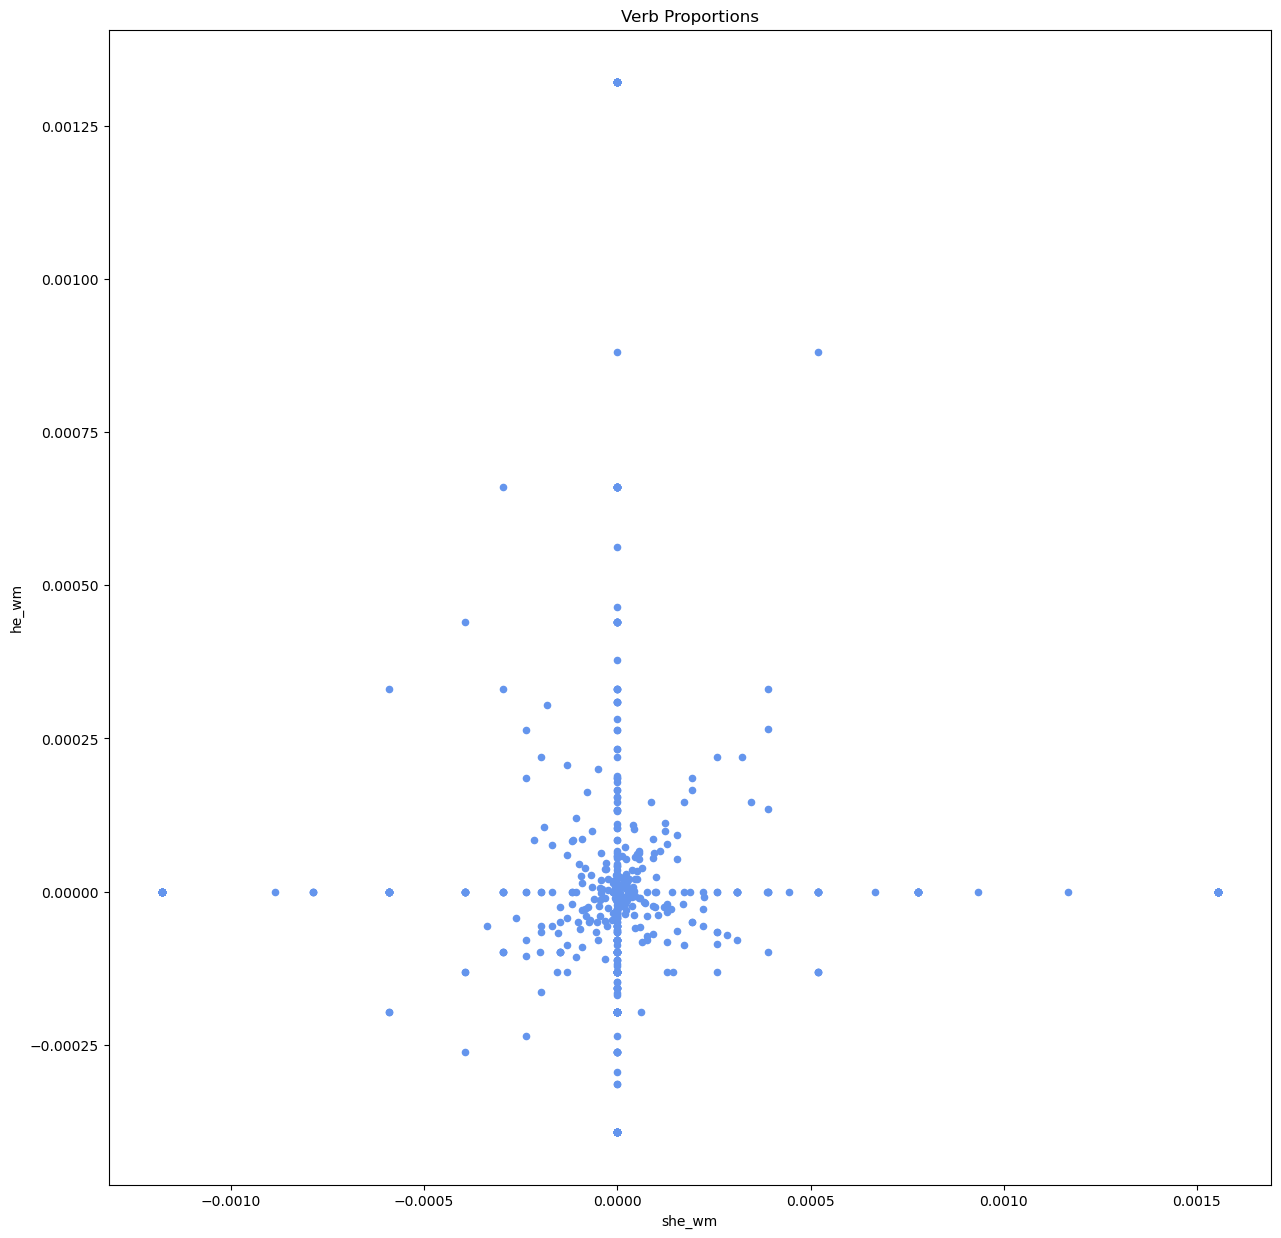

In [50]:
verbs.plot(
    x="she_wm",
    y="he_wm",
    kind='scatter',
    title="Verb Proportions",
    legend=False,
    xlabel=None,
    ylabel=None,
    c='cornflowerblue',
    s=None,
    figsize = (15,15)
)
plt.show()

**TO DO**: Do something with this dataframe.

## Visualizing Subject Positions

### "he"

In these first scatter plots for "he" verbs in both the men's and women's subcorpora, we see that there are 514 verbs used by men and 246 used by women. Again, we can't be sure if that number reflects anything more than a power law at work, despite the fact that there are twice as many verbs used by men but three times the talk. 

**TO DO**: Get a total word count for the two subcorpora.

With the merge, we are left with 159 verbs in common, which does raise interesting possibilities about the verbs that are dropped from the intersection.

In [51]:
import seaborn.objects as so
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=300)
import matplotlib.lines as mlines

ModuleNotFoundError: No module named 'seaborn.objects'

In [ ]:
# Create the dataframe with the intersection of the two sets of verbs
comp_he = m_he.merge(
    w_he, 
    left_on = "verb", right_on = "verb", 
    suffixes=("_m", "_w"))

print(comp_he.shape)
print(comp_he.head())

In [ ]:
## KK's visualization
sns.scatterplot(data = comp_he, x = "v_rfreq_m", y = "v_rfreq_w")

In [ ]:
# JL's attempts to make things bigger
# First plot grabs the top 15 verbs
p = so.Plot(comp_he.iloc[0:15],
            x='v_rfreq_m',
            y='v_rfreq_w',
            text='verb').add(so.Dot(marker='+')).add(so.Text(halign='left')).layout(size=(10,10))
p.show()

In [ ]:
# Second figure plots the remaining verbs

plt = so.Plot(comp_he.iloc[15:],
            x='v_rfreq_m',
            y='v_rfreq_w',
            text='verb').add(so.Dot(marker='+')).add(so.Text(halign='left')).layout(size=(10,10))
plt.show()

#### Complements

Recall, that in the men's subcorpus "he" pairs with 514 verbs, and in the women's subcorpus 246 verbs, but there are only 159 verbs that appear in both. In this next series of cells, we explore the verbs associated with "he" that do not appear in both subcorpora. 

In [ ]:
# Create dictionaries from the two lists
dict1 = dict(m_he.values)
dict2 = dict(w_he.values)

# Find verbs that only occur
m_he_set = set(dict1.keys())-(set(dict2.keys()))

# Filter the dataframe
m_he_only = m_he[m_he["verb"].isin(m_he_set)]

print(m_he_only.shape)
print(m_he_only.head(20))

In [ ]:
# Find verbs that only occur
w_he_set = (set(dict2.keys())) - set(dict1.keys())

# Filter the dataframe
w_he_only = w_he[w_he["verb"].isin(w_he_set)]

print(w_he_only.shape)
print(w_he_only.head(20))

## Pointwise Mutual Information with SV Pairs

<div class="alert alert-block alert-info"> 
    <p>This may be entirely pointless.</p>
    </div>

Following Agersnap et al's use of PMI scores for every pronoun verb collocation...

NLTK reference: [Sample usage for collocations](https://www.nltk.org/howto/collocations.html).

In [ ]:
# Our two dataframes with the relevant SVOs: m_pp_svo, w_pp_svo
w_pp_svo.head()

## Unexplained Experimentation

StreamHacker has an interesting post on [chi square](https://streamhacker.com/tag/chi-square/) measures in order to determine the best features for pos / neg movie reviews.

> One of the best metrics for information gain is chi square. NLTK includes this in the BigramAssocMeasures class in the metrics package. To use it, first we need to calculate a few frequencies for each word: its overall frequency and its frequency within each class. This is done with a FreqDist for overall frequency of words, and a ConditionalFreqDist where the conditions are the class labels. Once we have those numbers, we can score words with the BigramAssocMeasures.chi_sq function, then sort the words by score and take the top 10000. We then put these words into a set, and use a set membership test in our feature selection function to select only those words that appear in the set. Now each file is classified based on the presence of these high information words.

In [ ]:
import numpy as np
from sklearn.feature_selection import f_regression

# Define the feature matrix X and the target vector y for the 6 samples
y = np.array([0, 1, 0, 1, 0, 1])

# Perform feature selection using the f_regression method
f_values, p_values = f_regression(concatenated, y)

# Print the results
for i in range(len(f_values)):
    print("Feature", i+1, "F-value:", f_values[i], "p-value:", p_values[i])


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the feature matrix X and the target vector y for the 6 samples
X = concatenated
y = np.array([0, 1, 0, 1, 0, 1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Pronoun-Verb Pair Ratios

In [ ]:
# Pronouns of interest
pronouns = ["he", "she"]

# Count the pronoun-verb pairs
m_pv = svos_m[svos_m["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()

# Re-label the new column from "0" to something human-readable
m_pv.rename(columns={0:'v_freq'}, inplace=True)

m_pv.head()